<a href="https://colab.research.google.com/github/KVJ0607/text2img/blob/main/WCT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text to image model WCT2 
[github](https://github.com/clovaai/WCT2)

To make a new dataset with label pairs, please follow the instruction of PhotoWCT repo
[PhotoWCT repo](https://github.com/NVIDIA/FastPhotoStyle/blob/master/TUTORIAL.md)

In [1]:
#!pip install -r requirement.txt
%mkdir img_content
%mkdir img_style

%mkdir img_content_seg
%mkdir img_style_seg 
%mkdir results1
%mkdir results2
%mkdir results3

##WCT2 is our main model, deep-photo-styletransfer provider extra example 
!git clone https://github.com/clovaai/WCT2.git
!git clone https://github.com/luanfujun/deep-photo-styletransfer
## rename file 
%cd /content/deep-photo-styletransfer/examples/style
!rename 's/tar/in/g' *.png
%cd /content

## For prodiving semantic segmentation 
!git clone https://github.com/CSAILVision/semantic-segmentation-pytorch
#%cd segmentation
#!./demo_test.sh


import sys
sys.path.append('/content/WCT2')
sys.path.append('/content/semantic-segmentation-pytorch')

Cloning into 'WCT2'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 149 (delta 36), reused 31 (delta 31), pack-reused 106
Receiving objects: 100% (149/149), 112.75 MiB | 59.89 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Cloning into 'deep-photo-styletransfer'...
remote: Enumerating objects: 705, done.
remote: Total 705 (delta 0), reused 0 (delta 0), pack-reused 705
Receiving objects: 100% (705/705), 170.17 MiB | 66.23 MiB/s, done.
Resolving deltas: 100% (185/185), done.
/content/deep-photo-styletransfer/examples/style
/content
Cloning into 'semantic-segmentation-pytorch'...
remote: Enumerating objects: 1170, done.
remote: Total 1170 (delta 0), reused 0 (delta 0), pack-reused 1170
Receiving objects: 100% (1170/1170), 5.04 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (707/707), done.


### Environment Setup

First, download the code and pretrained models if we are on colab.

[
Semantic Segmentation](https://github.com/CSAILVision/semantic-segmentation-pytorch/tree/master/notebooks)

In [2]:
%%bash
# Colab-specific setup
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit 
pip install yacs 2>&1 >> install.log
git init 2>&1 >> install.log
git remote add origin https://github.com/CSAILVision/semantic-segmentation-pytorch.git 2>> install.log
git pull origin master 2>&1 >> install.log
DOWNLOAD_ONLY=1 ./demo_test.sh 2>> install.log

From https://github.com/CSAILVision/semantic-segmentation-pytorch
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master


Prepare unsegmented content and style image in the corrsponding folder


In [3]:
downURL = 'https://lh6.ggpht.com/HlgucZ0ylJAfZgusynnUwxNIgIp5htNhShF559x3dRXiuy_UdP3UQVLYW6c=s1200'
downURL2 = 'https://cdn.dribbble.com/users/702789/screenshots/16900790/media/628a8bb9f58f4feaea51367fc58b32a3.png?compress=1&resize=400x300'

In [35]:
from google.colab import files as FILE
import os
import requests

%cd /content/img_style
img_data = requests.get(downURL).content
with open('in001.jpg', 'wb') as handler:
  handler.write(img_data)

FILE.download('in001.jpg')
#os.remove('style_image.jpg')

%cd /content/img_content
img_data = requests.get(downURL2).content
with open('in001.jpg', 'wb') as handler:
  handler.write(img_data)

FILE.download('in001.jpg')
#os.remove('cd_cover.jpg')

%cd /content


/content/img_style


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/img_content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content


In [5]:
#!pip install git+https://github.com/CSAILVision/semantic-segmentation-pytorch.git@master
%cd /content/semantic-segmentation-pytorch
!python setup.py install
#!pip install opencv-python 
#!pip install yacs
#!pip install tqdm

%cd /content

from yacs.config import CfgNode as CN
from mit_semseg.config import cfg
from mit_semseg.dataset import TestDataset
from mit_semseg.models import ModelBuilder, SegmentationModule
from mit_semseg.utils import colorEncode

/content/semantic-segmentation-pytorch
running install
running bdist_egg
running egg_info
creating mit_semseg.egg-info
writing mit_semseg.egg-info/PKG-INFO
writing dependency_links to mit_semseg.egg-info/dependency_links.txt
writing requirements to mit_semseg.egg-info/requires.txt
writing top-level names to mit_semseg.egg-info/top_level.txt
writing manifest file 'mit_semseg.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'mit_semseg.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mit_semseg
copying mit_semseg/__init__.py -> build/lib/mit_semseg
copying mit_semseg/utils.py -> build/lib/mit_semseg
copying mit_semseg/dataset.py -> build/lib/mit_semseg
creating build/lib/mit_semseg/config
copying mit_semseg/config/__init__.py -> build/lib/mit_semseg/config
copying mit_semseg/config/defaults.py -> build/lib/mit_semseg/config
creating build/lib/mit

In [6]:
#!python transfer.py --option_unpool cat5 -e --content ./examples/content --style ./examples/style --content_segment ./examples/content_segment --style_segment ./examples/style_segment/ --output ./outputs1/ --image_size 256
#!python transfer.py --option_unpool cat5 -d --content ./examples/content --style ./examples/style --content_segment ./examples/content_segment --style_segment ./examples/style_segment/ --output ./outputs2/ --image_size 256
#!python transfer.py --option_unpool cat5 -s --content ./examples/content --style ./examples/style --content_segment ./examples/content_segment --style_segment ./examples/style_segment/ --output ./outputs3/ --image_size 256

In [7]:

# Our libs
import sys
sys.path.append('/content/semantic-segmentation-pytorch')
from mit_semseg.models import ModelBuilder, SegmentationModule
from mit_semseg.utils import colorEncode

## Loading the segmentation model

Here we load a pretrained segmentation model.  Like any pytorch model, we can call it like a function, or examine the parameters in all the layers.

After loading, we put it on the GPU.  And since we are doing inference, not training, we put the model in eval mode.

In [8]:
import os, csv, torch, numpy, scipy.io, PIL.Image, torchvision.transforms
# Network Builders
net_encoder = ModelBuilder.build_encoder(
    arch='resnet50dilated',
    fc_dim=2048,
    weights='ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth')
net_decoder = ModelBuilder.build_decoder(
    arch='ppm_deepsup',
    fc_dim=2048,
    num_class=150,
    weights='ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth',
    use_softmax=True)

crit = torch.nn.NLLLoss(ignore_index=-1)
segmentation_module = SegmentationModule(net_encoder, net_decoder, crit)
segmentation_module.eval()
segmentation_module.cuda()

Loading weights for net_encoder
Loading weights for net_decoder


SegmentationModule(
  (encoder): ResnetDilated(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): SynchronizedBatchNorm2d(128, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): SynchronizedBatchNorm2d(64, eps=1

In [9]:
pil_to_tensor = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # These are RGB mean+std values
        std=[0.229, 0.224, 0.225])  # across a large photo dataset.
])

In [36]:
# System libs
import os, csv, torch, numpy, scipy.io, PIL.Image, torchvision.transforms
# Our libs
from mit_semseg.models import ModelBuilder, SegmentationModule
from mit_semseg.utils import colorEncode
import re

colors = scipy.io.loadmat('data/color150.mat')['colors']
names = {}
with open('data/object150_info.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        names[int(row[0])] = row[5].split(";")[0]

def visualize_result(img, pred, index=None):
    # filter prediction class if requested
    if index is not None:
        pred = pred.copy()
        pred[pred != index] = -1
        print(f'{names[index+1]}:')
        
    # colorize prediction
    pred_color = colorEncode(pred, colors).astype(numpy.uint8)

    # aggregate images and save
    im_vis = numpy.concatenate((img, pred_color), axis=1)
    display(PIL.Image.fromarray(im_vis))


def generate_semantic_seg(rootdir,isStyle):
  for subdir, dirs, files in os.walk(rootdir):
    for file in files: 
  
      #print(os.path.join(subdir, file)) # file is a str.jpg 
      #print(re.sub('jpg','png',file))


      pil_image = PIL.Image.open(os.path.join(subdir, file)).convert('RGB')
      img_original = numpy.array(pil_image)
      img_data = pil_to_tensor(pil_image)
      singleton_batch = {'img_data': img_data[None].cuda()}
      output_size = img_data.shape[1:]
      
      # Run the segmentation at the highest resolution.
      with torch.no_grad():
        scores = segmentation_module(singleton_batch, segSize=output_size)
    
      # Get the predicted scores for each pixel
      _, pred = torch.max(scores, dim=1)
      pred = pred.cpu()[0].numpy()
      visualize_result(img_original, pred)
      
      img = img_original
      # colorize prediction
      pred_color = colorEncode(pred, colors).astype(numpy.uint8)
      # aggregate images and save
      pil_image.save(os.path.join(subdir, re.sub('jpg','png',file)))
      if isStyle:
        target_dir = "/content/img_style_seg"
      else: 
        target_dir = "/content/img_content_seg"

      
      #pil_image.save(f'')

      PIL.Image.fromarray(pred_color).save(os.path.join(target_dir, re.sub('jpg','png',file)))


      
      #using the segmentation to do photo style transfer 
      #!python transfer.py --option_unpool cat5 -e --content /content/img_content --style ./content/img_style --content_segment /content/img_content_seg --style_segment /content/img_style_seg --output ./outputs1/ --image_size 256
      #!python transfer.py --option_unpool cat5 -d --content ./examples/content --style ./examples/style --content_segment ./examples/content_segment --style_segment ./examples/style_segment/ --output ./outputs2/ --image_size 256
      #!python transfer.py --option_unpool cat5 -s --content ./examples/content --style ./examples/style --content_segment ./examples/content_segment --style_segment ./examples/style_segment/ --output ./outputs3/ --image_size 256


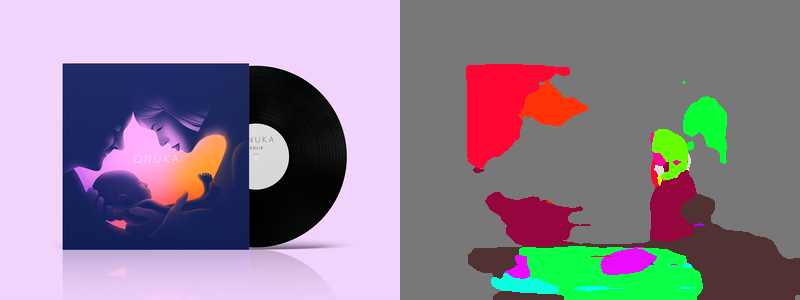

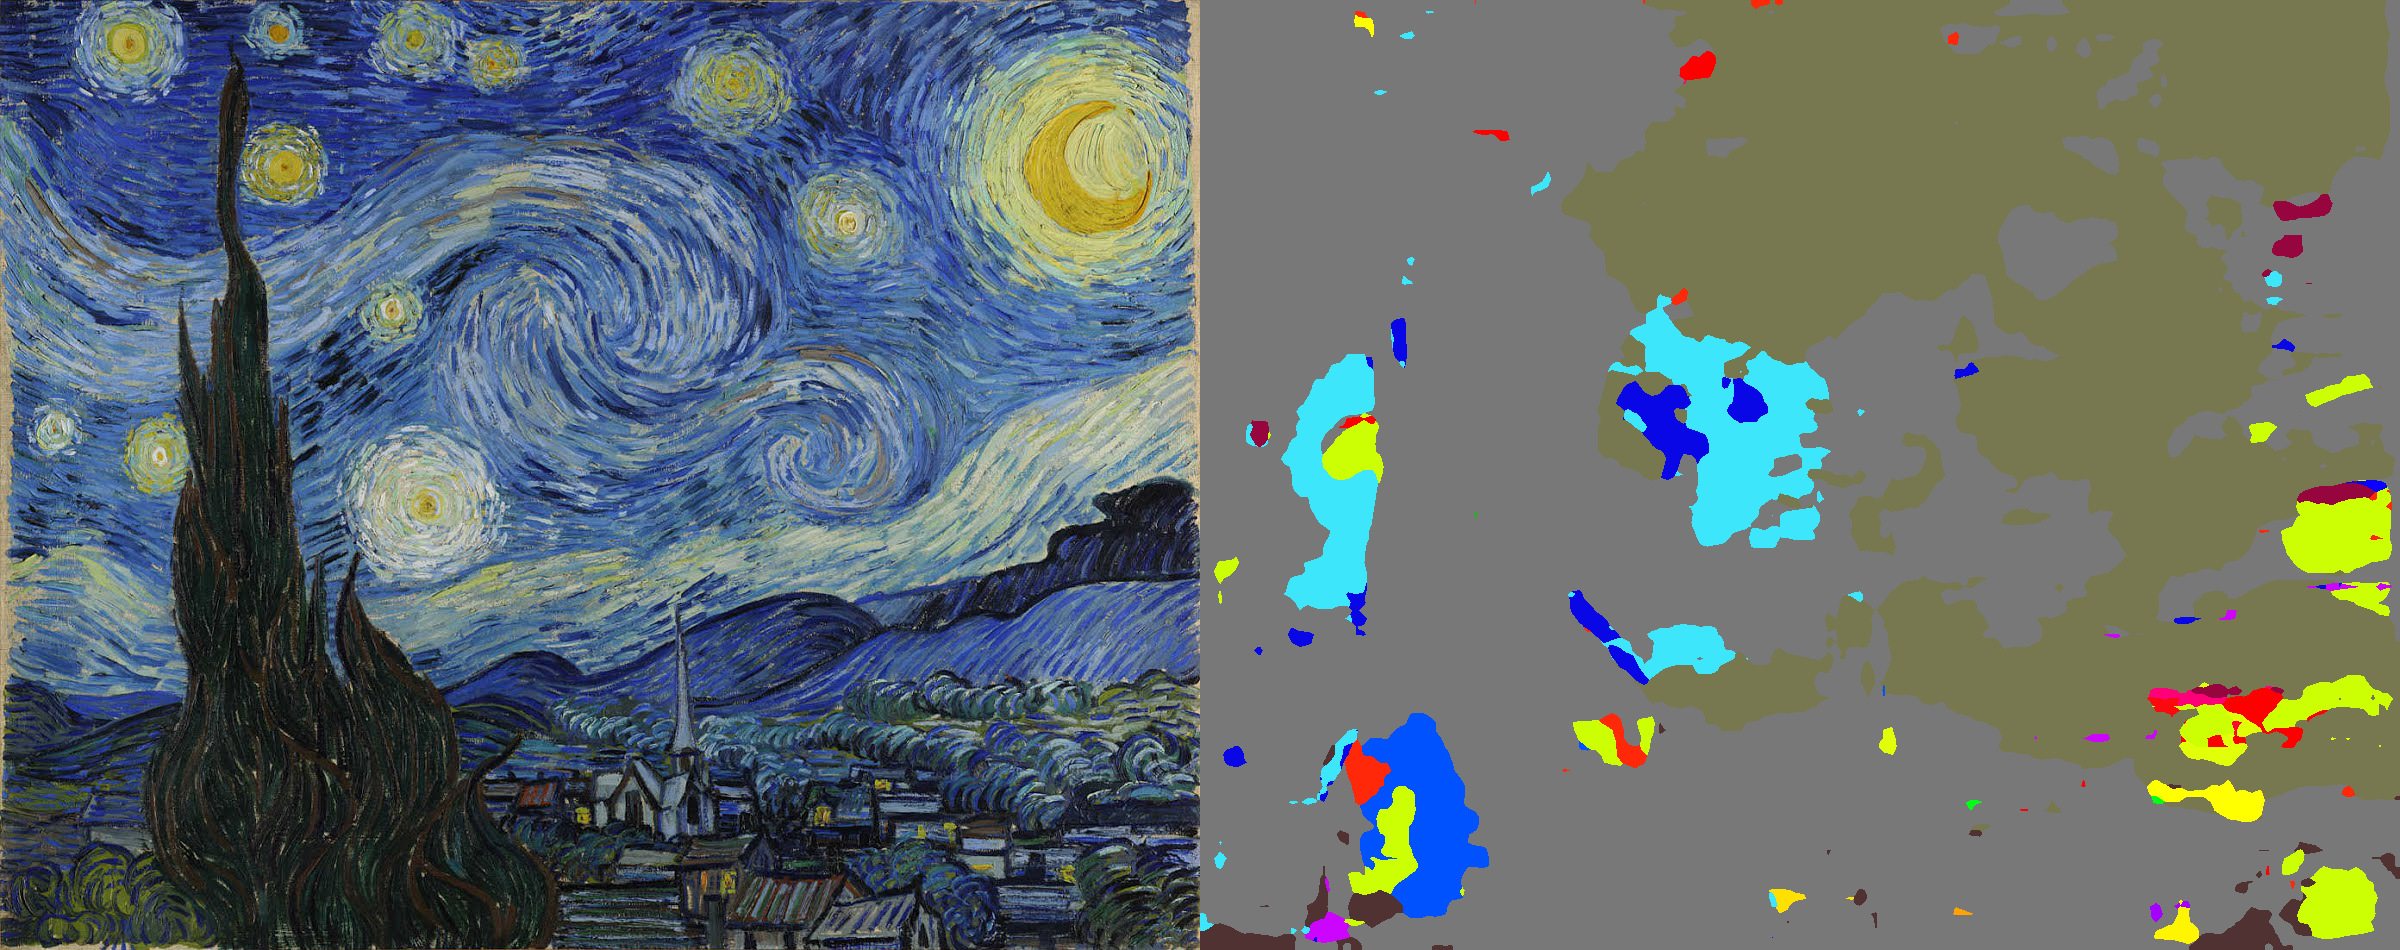

/content/WCT2
Namespace(alpha=1, content='/content/img_content', content_segment='/content/img_content_seg', cpu=False, image_size=256, option_unpool='cat5', output='/content/results1', style='/content/img_style', style_segment='/content/img_style_seg', transfer_all=False, transfer_at_decoder=False, transfer_at_encoder=True, transfer_at_skip=False, verbose=False)
  0% 0/2 [00:00<?, ?it/s]invalid file (is not image),  .ipynb_checkpoints
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
------ transfer: /content/results1/in001.png
100% 2/2 [00:15<00:00,  7.65s/it]
Namespace(alpha=1, content='/content/img_content', content_segment='/content/img_content_seg', cpu=False, image_size=256, option_unpool='cat5', output='/content/resu

In [37]:
generate_semantic_seg("/content/img_content", False)
generate_semantic_seg("/content/img_style", True)
%cd /content/WCT2
!python transfer.py --option_unpool cat5 -e --content /content/img_content --style /content/img_style --content_segment /content/img_content_seg --style_segment /content/img_style_seg --output /content/results1 --image_size 256
!python transfer.py --option_unpool cat5 -d --content /content/img_content --style /content/img_style --content_segment /content/img_content_seg --style_segment /content/img_style_seg --output /content/results2 --image_size 256
!python transfer.py --option_unpool cat5 -s --content /content/img_content --style /content/img_style --content_segment /content/img_content_seg --style_segment /content/img_style_seg --output /content/results3 --image_size 256

%cd /content

In [49]:
def recursive_show(rootdir):
    for subdir, dirs, files in os.walk(rootdir):
      for file in files: 
        my_img = PIL.Image.open(os.path.join(subdir,file))
        my_img.display()
        #display(PIL.Image(os.path.join(subdir,file)))

In [50]:
recursive_show('/content/results1')
recursive_show('/content/results2')
recursive_show('/content/results3')

AttributeError: ignored